# Plasmons in the Kretschmann-Raether Configuration

This project is a work in progress and is being completed as an assignment related to the Labratory Practices class in the Masters's Degree in Photonics (MDP) program at the University of Eastern Finland. The goal is to investigate surface plasmon propagation on metalic surface. In particular it is to first theoretically characterize the case of plasmons propagating on a gold film in the Kretschmann-Raether configuration across the visible range. After this has been completed the theoretical results will be compared with experiments results.

The fist task in this project was to use the materials provided to become more familiar with the concepts of surface plasmons (SPs), and specifically surface plasmon polaritons (SPPs). This included the publications by [Heinz Raether](http://www.fulviofrisone.com/attachments/article/406/raether_2.pdf) and the chapter regarding plasmons in the text by [Novotny and Hecht](https://www.photonics.ethz.ch/fileadmin/user_upload/Courses/NanoOptics/plasmonss.pdf). The second component of this project is to then develop a simulation of the provided system to:
<ul>
<li>The critical angle above which the surface plasmons can be excited. (Also explain why in the report)</li>
<li>The reflectivity spectra for two different linear polarizations (S and P, P divided by S) at different angles of incidence.</li>
<li>The dispersion relation of SPPs.</li>
<li>The influence of the metal thickness on the plasmon excitation should be examined.</li>    
<li>Examine the sensitivity of the plasmon to the surrounding by changing the refractive index of dielectric used.</li>
<li>Any other useful additions.</li>
</ul>

This simulation would be primarily based off equation 2.16 and 2.17 in the Raether text.
![2020-11-17T22_23_46.png](attachment:2020-11-17T22_23_46.png)

These equations show that the reflectivity will depend on the dieletric constants for the materials ($\epsilon_{ijk}$), the thickness of the film ($d$), and the wave vectors ($k_{zijk}$). Aditional equations from the text (2.3, 2.14) will be used to help find the values. Below is a sketch of the Kretschmann-Raether configuration used in this work.
![Kretschmann%20Configuration.png](attachment:Kretschmann%20Configuration.png)

Heikki Rekola gave gave a description of the system as a prism of BK7 glass with a film of 50 nm thick gold (Au) on the base. The optical wavelengths will be approxiamted from 0.380-0.700 μm and angles 40-60$^\circ$ will be the range for finding important results. To start it is necessary to import the packages that will be used. I have handled imports a bit differently than I normaly would in an effort to increase readability.

In [1]:
import pandas as pd
import numpy as np
from numpy import sin, abs, exp, pi as π
from numpy.lib.scimath import sqrt
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
from scipy import interpolate

The next step is to define the varibles that are given (also the desired resolution of the simulation).

In [2]:
#%% Givens
res = 101 #Number of points
λ_min = 0.4 #Approximate lower threshold for visible light
λ_max = 0.7 #Approximate lower threshold for visible light
λ = np.linspace(λ_min, λ_max, res) #Optical range in micrometers range from advisor
#λ = np.array([.380, .381]) #placeholder value for testing
θ_min = 40 #lower limit in degrees
θ_max = 60 #Upper limit in degrees 
θ = np.arange(θ_min, θ_max+1) #Sugested range from advisor
#θ = np.array([50,51]) #placeholder value for testing
d = 0.05 #Film is given as 50 nm thick -->.05 micrometer
#ε0 = 8.8541878128E-18 #F/µm (farads per micrometer)
#c = 299792458 #Meters per second

Now to begin solving for the unknowns in the equations. The dieletric constants for the materials may be found from their refractive indices. While for some materials it is possible to consider the refractive index ($n$) as a constant, in reality it varries with wavelength ($\lambda$). For the sake of consistency, all three materials in the setup will be treated as similar as possible. First, the refractive index is retreived from [RefractiveIndex.INFO](https://refractiveindex.info/) an online database for refractive idices. This information is imported as a dataframe using the Pandas library. These are then converted to NumPy arrays, and then interpolated to be functions of wavelength.

In [3]:
n_Au = pd.read_csv('https://refractiveindex.info/data_csv.php?datafile=data/main/Au/Johnson.yml')
n_BK7 = pd.read_csv('https://refractiveindex.info/data_csv.php?datafile=data/glass/schott/N-BK7.yml')
n_Air = pd.read_csv('https://refractiveindex.info/data_csv.php?datafile=data/other/mixed%20gases/air/Ciddor.yml')

n_Au = np.transpose(np.array([n_Au.apply(pd.to_numeric, errors='coerce').to_numpy()[:49,0], 
    ((n_Au.apply(pd.to_numeric, errors='coerce')).to_numpy()[:49,1]+
    (n_Au.apply(pd.to_numeric, errors='coerce')).to_numpy()[-49:,1]*1j)]))
n_BK7 = (n_BK7.apply(pd.to_numeric, errors='coerce')).to_numpy()[:101,:]
n_Air = (n_Air.apply(pd.to_numeric, errors='coerce')).to_numpy()

n_Au = interpolate.interp1d(n_Au[:,0], n_Au[:,1])
n_BK7 = interpolate.interp1d(n_BK7[:,0], n_BK7[:,1])
n_Air = interpolate.interp1d(n_Air[:,0], n_Air[:,1])

If the refractive index is plotted across the optical spectrum, it becomes obvious why Au needed to be treated as a function rather than a constant.

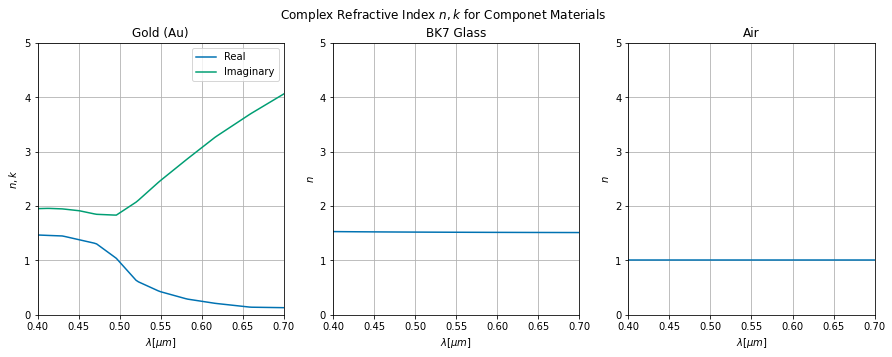

In [4]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 5])
plt.suptitle('Complex Refractive Index $n,k$ for Componet Materials')
axs[0].set(title='Gold (Au)', xlabel='$\lambda [\mu m]$',
           ylabel = '$n,k$', ylim = (0, 5) , xlim = (λ[0], λ[-1]))
axs[0].plot(λ,np.real(n_Au(λ)), label = 'Real')
axs[0].plot(λ,np.imag(n_Au(λ)), label = 'Imaginary')
axs[0].grid()
axs[0].legend()

axs[1].set(title='BK7 Glass', xlabel='$\lambda [\mu m]$',
           ylabel = '$n$', ylim = (0, 5), xlim = (λ[0], λ[-1]))
axs[1].plot(λ,n_BK7(λ))
axs[1].grid()

axs[2].set(title='Air', xlabel='$\lambda [\mu m]$',
           ylabel = '$n$', ylim = (0, 5), xlim = (λ[0], λ[-1]))
axs[2].plot(λ,n_Air(λ))
axs[2].grid()

The next step in being able to use equation 2.17 is to be able to solve for the dieletric properties for the materials in the system. For finding the relative permittivity, Hecht Optics gives the condition that when the material is non-magnetic Maxwell's Realtion may be applied, in which case the relative permittivity is simply the square of the refractive index.

In [5]:
ε_0 = n_BK7(λ)**2
ε_1 = n_Au(λ)**2
ε_2 = n_Air(λ)**2

Equation 2.14 in Reather gives the formula for finding $k_x$ from the relative permittivity of the prism ($ε_0=n^2_\text{BK7}$) and $\sin(\theta_0)$ the angle of incidence with the prism. By inputting both $n(\lambda)$ and the range of $\theta_0$ to this equation, the result is $k_x(\lambda,\theta)$. Here the empty matrix is first preallocated, and then using nested for loops the values of $k_x$ are then filled in.

In [6]:
k_x = np.empty([len(λ),len(θ)])
for n in range(len(λ)):
    for m in range(len(θ)):
        k_x[n, m] = (2*π*(n_BK7(λ[n])/λ[n])*sin(np.deg2rad(θ[m])))

Equation 2.3 gives the relation for $k_{zi}$ in terms of relative permeability, and $k_x$. So it is now possible to find $k_{zi}(\lambda, \theta)$

In [7]:
k_z0 = np.empty([len(λ),len(θ)], dtype = complex)
k_z1 = np.empty([len(λ),len(θ)], dtype = complex)
k_z2 = np.empty([len(λ),len(θ)], dtype = complex)
for n in range(len(λ)):
    for m in range(len(θ)):
        k_z0[n,m] = sqrt(ε_0[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
        k_z1[n,m] = sqrt(ε_1[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
        k_z2[n,m] = sqrt(ε_2[n]*(2*π/λ[n])**2 - k_x[n,m]**2)

Bringing this all together in equation 2.17 yields $r^p_{ik}(\lambda, \theta)$

In [8]:
rp_01 = np.empty([len(λ),len(θ)], dtype = complex)
rp_12 = np.empty([len(λ),len(θ)], dtype = complex)

for n in range(len(λ)):
    for m in range(len(θ)):
        rp_01[n, m] = (k_z0[n, m]/ε_0[n] - k_z1[n, m]/ε_1[n])/(k_z0[n, m]/ε_0[n] + k_z1[n, m]/ε_1[n])
        rp_12[n, m] = (k_z1[n, m]/ε_1[n] - k_z2[n, m]/ε_2[n])/(k_z1[n, m]/ε_1[n] + k_z2[n, m]/ε_2[n])

With the help of equation 2.17, everything in equation 2.16 is now known, and $R_p(\lambda, \theta)$ may now be solved.

In [9]:
Rp = np.empty([len(λ),len(θ)])
for n in range(len(λ)):
    for m in range(len(θ)):
        Rp[n, m] = abs((rp_01[n, m]+rp_12[n, m]*exp(2*1j*k_z1[n, m]*d))/
                      (1+rp_01[n, m]*rp_12[n, m]*exp(2*1j*k_z1[n, m]*d)))**2

Now it is possible to plot $R_p(\theta)$ for a range of wavelengths, r  𝑅𝑝(𝜆)  across the range of  𝜃0 

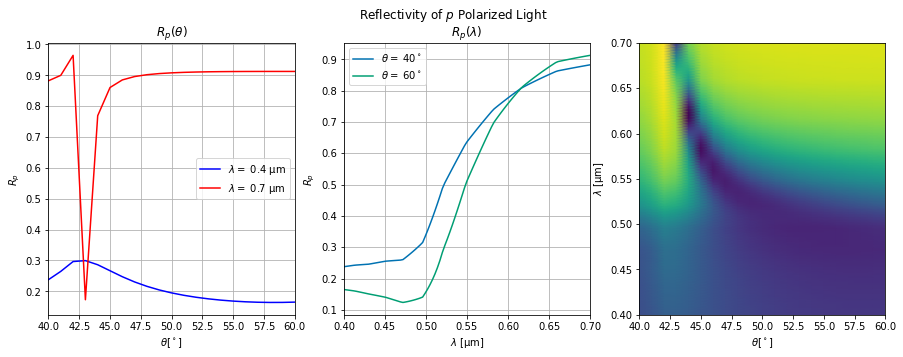

In [10]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 5])
plt.suptitle('Reflectivity of $p$ Polarized Light')
axs[0].set(title='$R_p(\\theta)$', xlabel= '$\\theta[^\circ]$',
           ylabel = '$R_p$', xlim = (θ[0], θ[-1]))
axs[0].plot(θ, Rp[0,:], color = 'b', label = '$\lambda =$ ' + str(λ[0]) + ' µm')
axs[0].plot(θ, Rp[-1,:], color = 'r', label = '$\lambda =$ ' + str(λ[-1]) + ' µm')
axs[0].grid()
axs[0].legend()

axs[1].set(title = '$R_p(\lambda)$', xlabel = '$\lambda$ [μm]',
           ylabel = '$R_p$', xlim = (λ[0], λ[-1]))
axs[1].plot(λ, Rp[:,0], label = '$\\theta =$ ' + str(θ[0]) + '$^\circ$')
axs[1].plot(λ, Rp[:,-1], label = '$\\theta =$ ' + str(θ[-1]) + '$^\circ$')
axs[1].grid()
axs[1].legend()

axs[2].set(xlabel= '$\\theta[^\circ]$', ylabel = '$\lambda$ [μm]')
axs[2].pcolormesh(θ, λ, Rp, shading='gouraud')

Carrying out a similar series of operations to consider $s$ polarization...

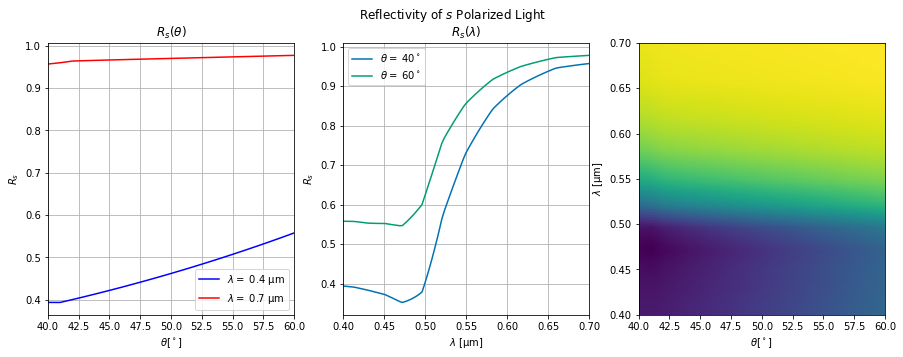

In [11]:
rs_01 = np.empty([len(λ),len(θ)], dtype = complex)
rs_12 = np.empty([len(λ),len(θ)], dtype = complex)
for n in range(len(λ)):
    for m in range(len(θ)):
        rs_01[n, m] = (k_z0[n, m] - k_z1[n, m])/(k_z0[n, m] + k_z1[n, m])
        rs_12[n, m] = (k_z1[n, m] - k_z2[n, m])/(k_z1[n, m] + k_z2[n, m])

Rs = np.empty([len(λ),len(θ)])
for n in range(len(λ)):
    for m in range(len(θ)):
        Rs[n, m] = abs((rs_01[n, m]+rs_12[n, m]*exp(2*1j*k_z1[n, m]*d))/
                      (1+rs_01[n, m]*rs_12[n, m]*exp(2*1j*k_z1[n, m]*d)))**2

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 5])
plt.suptitle('Reflectivity of $s$ Polarized Light')
axs[0].set(title='$R_s(\\theta)$', xlabel= '$\\theta[^\circ]$',
           ylabel = '$R_s$', xlim = (θ[0], θ[-1]))
axs[0].plot(θ, Rs[0,:], color = 'b', label = '$\lambda =$ ' + str(λ[0]) + ' µm')
axs[0].plot(θ, Rs[-1,:], color = 'r', label = '$\lambda =$ ' + str(λ[-1]) + ' µm')
axs[0].grid()
axs[0].legend()

axs[1].set(title = '$R_s(\lambda)$', xlabel = '$\lambda$ [μm]',
           ylabel = '$R_s$', xlim = (λ[0], λ[-1]))
axs[1].plot(λ, Rs[:,0], label = '$\\theta =$ ' + str(θ[0]) + '$^\circ$')
axs[1].plot(λ, Rs[:,-1], label = '$\\theta =$ ' + str(θ[-1]) + '$^\circ$')
axs[1].grid()
axs[1].legend()

axs[2].set(xlabel= '$\\theta[^\circ]$', ylabel = '$\lambda$ [μm]')
axs[2].pcolormesh(θ, λ, Rs, shading='gouraud')

Now it is possible the find the ratio of $R_p/R_s$

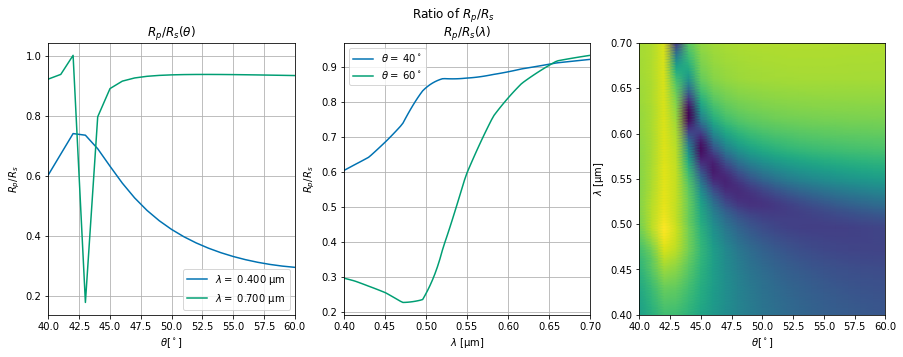

In [12]:
Ratio = np.empty([len(λ),len(θ)])
for n in range(len(λ)):
    for m in range(len(θ)):
        Ratio[n, m] = Rp[n, m]/Rs[n, m]

# Placing this into a data frame for later use.
df_expected = pd.DataFrame(Ratio, columns = θ, index = λ)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 5])
plt.suptitle('Ratio of $R_p/R_s$')
axs[0].set(title='$R_p/R_s(\\theta)$', xlabel= '$\\theta[^\circ]$',
           ylabel = '$R_p/R_s$', xlim = (θ[0], θ[-1]))
axs[0].plot(θ, Ratio[0,:],  label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
axs[0].plot(θ, Ratio[-1,:], label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm')
axs[0].grid()
axs[0].legend()

axs[1].set(title = '$R_p/R_s(\lambda)$', xlabel = '$\lambda$ [μm]',
           ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[1].plot(λ, Ratio[:,0], label = '$\\theta =$ ' + str(θ[0]) + '$^\circ$')
axs[1].plot(λ, Ratio[:,-1], label = '$\\theta =$ ' + str(θ[-1]) + '$^\circ$')
axs[1].grid()
axs[1].legend()

axs[2].set(xlabel= '$\\theta[^\circ]$', ylabel = '$\lambda$ [μm]')
axs[2].pcolormesh(θ, λ, Ratio, shading='gouraud')

<function matplotlib.pyplot.show(close=None, block=None)>

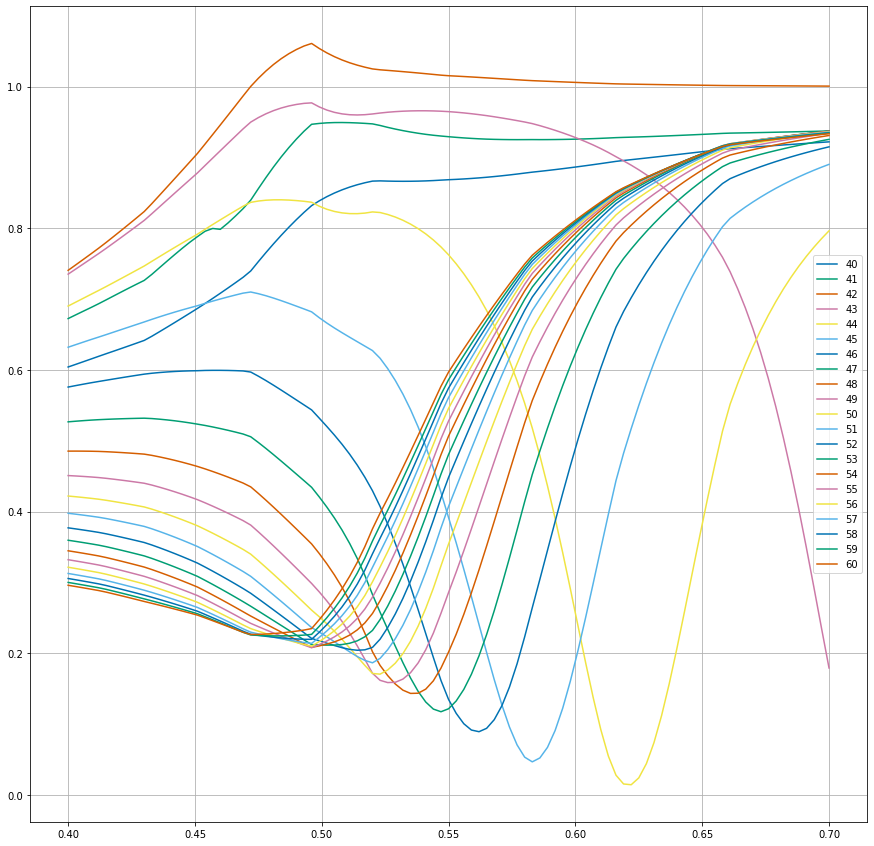

In [13]:
ax = df_expected.plot(figsize = (15, 15))
ax.grid()
plt.show

## Data Collection

Below is the full experimental setup for this work.

![ExpSetup.png](attachment:ExpSetup.png)

The setup uses a halogen lamp as a source for white light. A series of aperatures and a polarizer are then used to polarize and  columnate the light before it is incident on the prism. A glass slide has been coated with the gold film and an imersion oil with effectively the same refractive index as the prism and slide is used to meld the two. This setup achieves the same effect as having the film coated directly to the prism while simplifying the fabrication. The prism is attached to a rotating stage, which has a micro agjuster allowing for arcminute adjustments. A portion of the light will then be reflected from the film and will pass through a focusing lens such that it is focused onto a multi-mode fiber optic cable which is connected to the spectrometer. The lens and cable are attached to a free spinning detector arm. The spectrometer used for this setup is the Avantspec 2048 which is connected to a computer running the Avasoft version 7.5.3 software to read the spectrum.

The first step in using the setup was to identify the zero point of the stage which was found by alligning the reflected beam with the incident beam. Then data was collected on the 40-60$^\circ$ range in 1$^\circ$ incriments by adding the measurment point to the zero point. Every time the stage was adjusted the detector arm needed to be moved to make the new measurement. A limitation of this experimental setup is that ther is actually a range of locations where the detector is able to measure the spectrum, and the spectrum will change deending on where it is sitting in that range. For consistency, to place the detector arm the range of response was found and the detector was place in the middle of that range. With an integration time of 500 ms, the graph was recorded, and the polarization was flipped from $p$ polarization to $s$ or vice versa, and a second graph was recorded. This was then repeated for each measurement. Finally the a dark spectrum was recorded with the light source off. Then the software converted all of the graphs to a single Excel file, which has been converted to .csv for use here. This first step is to import the data again using the Pandas library.

In [14]:
df_experimental = pd.read_csv('PlasmonData.csv', header = 5, index_col=0)
df_experimental.head()

,M- 40P,M- 40S,M- 41P,M- 41S,M- 42P,M- 42S,M- 43P,M- 43S,M- 44P,M- 44S,...,M- 57P,M- 57S,M- 58P,M- 58S,M- 59P,M- 59S,M- 60P,M- 60S,M- DARK,Unnamed: 44
Wavelength[µm],,,,,,,,,,,,,,,,,,,,,
0.175985,497,520,519,497,528,529,489,499,491,500,...,466,503,504,480,470,467,472,512,478,0.000176
0.176582,561,599,576,566,590,609,555,545,538,574,...,553,523,517,564,534,556,532,553,527,0.000177
0.177178,552,524,567,548,573,567,527,514,509,536,...,530,541,505,535,518,524,519,506,490,0.000177
0.177775,539,533,538,547,568,559,513,509,486,532,...,491,503,481,479,508,490,477,484,472,0.000178
0.178371,528,574,559,559,567,557,505,547,527,552,...,523,475,513,517,532,511,491,517,460,0.000178


As may be seen from the dataframe above, the measured spectrum for each polarization at each data point is saved in ajacent rows, and the darkfield is in the final column. The dark field spectrum will first be seperated, and then subtracted from all of the measuements. Next the respective adjacent columns will be divided by each other to find the ratio $R_p/R_s$. Finally the data will be turned into a NumPy array such that it may be handled similarly to the theoretical data.

In [15]:
# removes unnecessary wavelengths
df_experimental = df_experimental[df_experimental.index >= λ_min] 
df_experimental = df_experimental[df_experimental.index <= λ_max]
df_experimental_indices = df_experimental.index #save the new idices for later

# Isolate and drop the dark field
Dark = df_experimental['M- DARK']
df_experimental.drop(['M- DARK',
                      'Unnamed: 44'], # There is one extra sprectum that was accidently collected
                      inplace=True, axis=1)

# Subtract the dark field from each measurement
df_experimental = df_experimental.sub(Dark, axis = 0)

# Divide the measured Rp by Rs
df_experimental = pd.DataFrame(np.divide.reduceat(df_experimental.values,
                                                  np.arange(len(df_experimental.columns))[::2], 
                                                  axis=1))

# Relable columns and indices
df_experimental.columns = θ
df_experimental.index = df_experimental_indices

Plotting the experimental data of the expected theoretical results will provide some initial impressions for comparing the two.

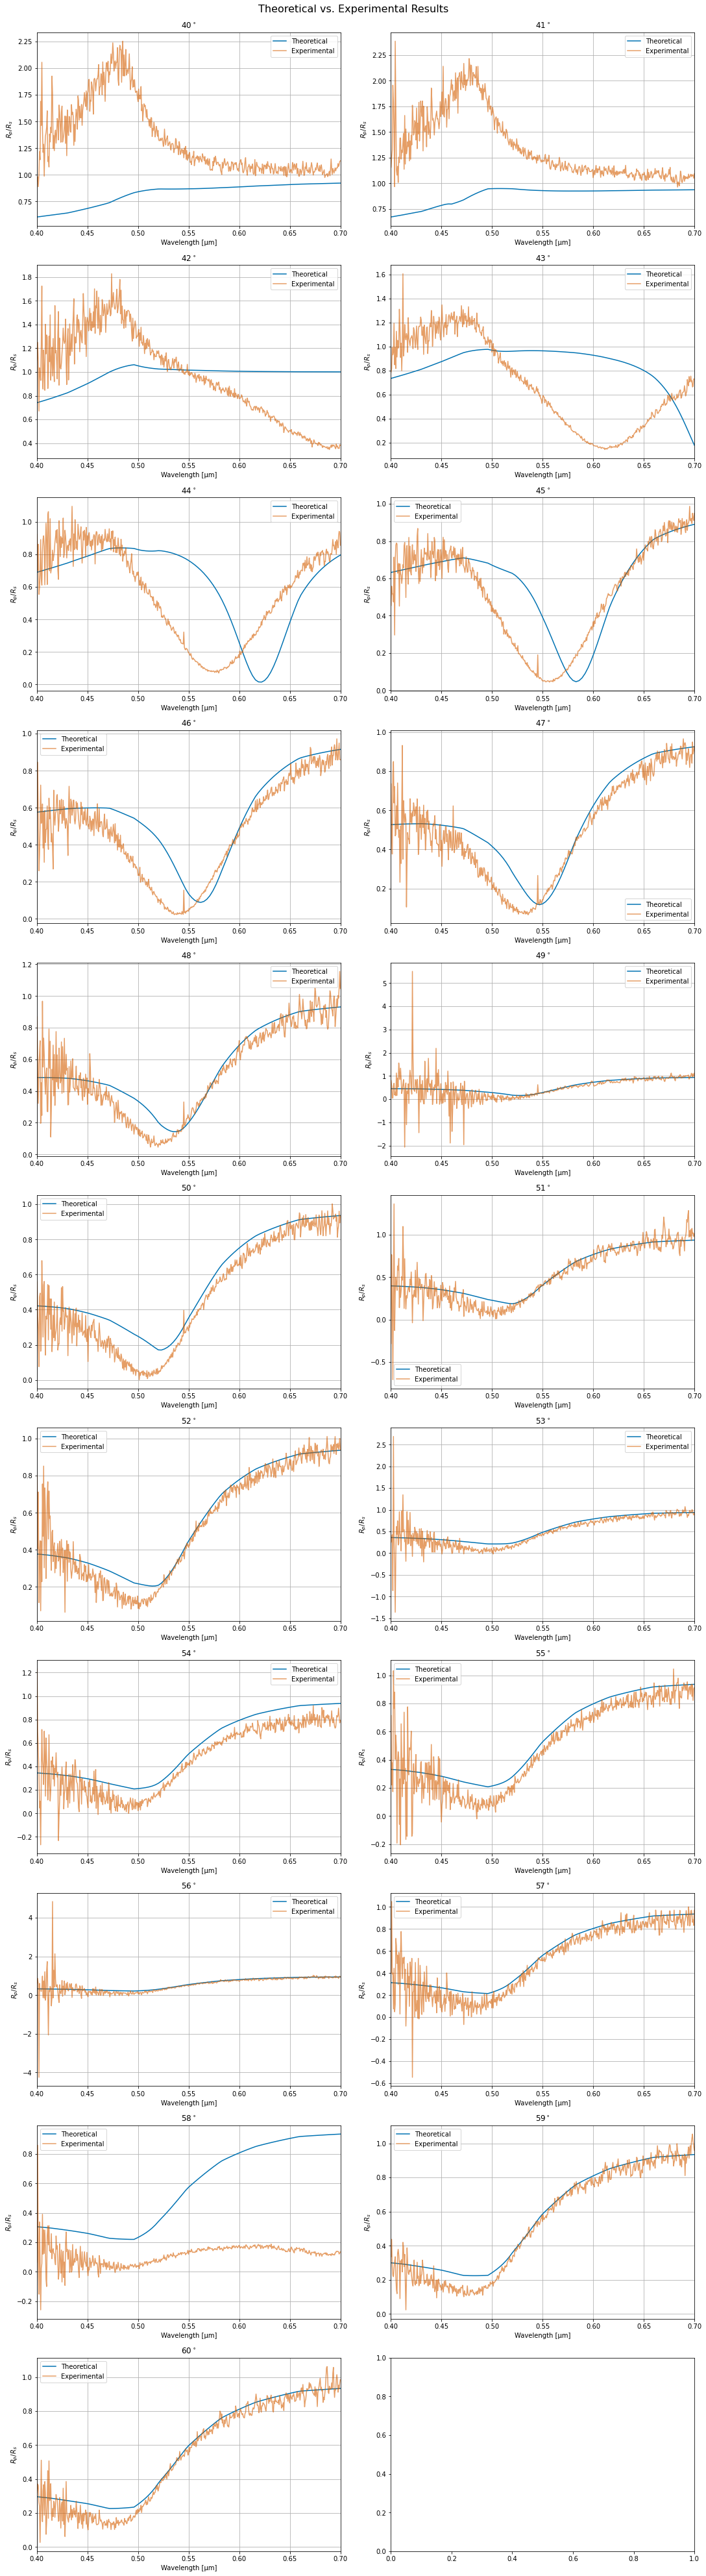

In [16]:
fig, axs = plt.subplots(
    nrows = 11, 
    ncols = 2, 
    figsize = [15, 55],
    constrained_layout=True)
plt.suptitle('Theoretical vs. Experimental Results', fontsize = 16)

for i in range(len(θ)):
    axs[int(i/2), i%2].set(
        title = str(θ[i]) + '$^\circ$', 
        xlabel = 'Wavelength [μm]',
        ylabel = '$R_p/R_s$',
        xlim = (λ_min, λ_max)
    )
    axs[int(i/2), i%2].plot(
        df_expected[θ[i]],
        label = 'Theoretical')
    axs[int(i/2), i%2].plot(
        df_experimental[θ[i]],
        label = 'Experimental',
        color = 'C2',
        alpha = 0.6)
    axs[int(i/2), i%2].grid()
    axs[int(i/2), i%2].legend()

plt.show()

### Visualizing error
Unfortunately the measurments from Avasof are not evenly distributed, and so the two ways to find the error at for a given data point is to either interpolate the $R_p/R_s$ funtion for the values or to resolve the ratio using the new wavelengths as input instead of the orignal equaly spaced spaced array.

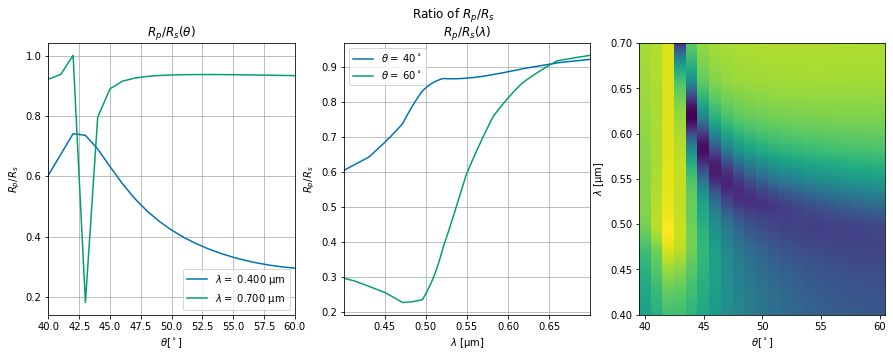

In [17]:
# Make new wavelength array from Avasoft data points
λ = df_experimental_indices.to_numpy()

# Recalculate the permaticities
ε_0 = n_BK7(λ)**2
ε_1 = n_Au(λ)**2
ε_2 = n_Air(λ)**2

# All derivative values ofcourse must be recalculated as well
k_x = np.empty([len(λ),len(θ)])

k_z0 = np.empty([len(λ),len(θ)], dtype = complex)
k_z1 = np.empty([len(λ),len(θ)], dtype = complex)
k_z2 = np.empty([len(λ),len(θ)], dtype = complex)

rp_01 = np.empty([len(λ),len(θ)], dtype = complex)
rp_12 = np.empty([len(λ),len(θ)], dtype = complex)

rs_01 = np.empty([len(λ),len(θ)], dtype = complex)
rs_12 = np.empty([len(λ),len(θ)], dtype = complex)

Rp = np.empty([len(λ),len(θ)])
Rs = np.empty([len(λ),len(θ)])
Ratio = np.empty([len(λ),len(θ)])
for n in range(len(λ)):
    for m in range(len(θ)):
        k_x[n, m] = (2*π*(n_BK7(λ[n])/λ[n])*sin(np.deg2rad(θ[m])))

        k_z0[n,m] = sqrt(ε_0[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
        k_z1[n,m] = sqrt(ε_1[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
        k_z2[n,m] = sqrt(ε_2[n]*(2*π/λ[n])**2 - k_x[n,m]**2)

        rp_01[n, m] = (k_z0[n, m]/ε_0[n] - k_z1[n, m]/ε_1[n])/(k_z0[n, m]/ε_0[n] + k_z1[n, m]/ε_1[n])
        rp_12[n, m] = (k_z1[n, m]/ε_1[n] - k_z2[n, m]/ε_2[n])/(k_z1[n, m]/ε_1[n] + k_z2[n, m]/ε_2[n])

        rs_01[n, m] = (k_z0[n, m] - k_z1[n, m])/(k_z0[n, m] + k_z1[n, m])
        rs_12[n, m] = (k_z1[n, m] - k_z2[n, m])/(k_z1[n, m] + k_z2[n, m])

        Rp[n, m] = abs((rp_01[n, m]+rp_12[n, m]*exp(2*1j*k_z1[n, m]*d))/
                      (1+rp_01[n, m]*rp_12[n, m]*exp(2*1j*k_z1[n, m]*d)))**2
        Rs[n, m] = abs((rs_01[n, m]+rs_12[n, m]*exp(2*1j*k_z1[n, m]*d))/
                      (1+rs_01[n, m]*rs_12[n, m]*exp(2*1j*k_z1[n, m]*d)))**2
        Ratio[n, m] = Rp[n, m]/Rs[n, m]

# Now update the dataframe
df_expected = pd.DataFrame(Ratio, columns = θ, index = λ)

# To verify that his hasn't affected the results a lot, repolt the updated expected data
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 5])
plt.suptitle('Ratio of $R_p/R_s$')
axs[0].set(title='$R_p/R_s(\\theta)$', xlabel= '$\\theta[^\circ]$',
           ylabel = '$R_p/R_s$', xlim = (θ[0], θ[-1]))
axs[0].plot(θ, Ratio[0,:],  label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
axs[0].plot(θ, Ratio[-1,:], label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm')
axs[0].grid()
axs[0].legend()

axs[1].set(title = '$R_p/R_s(\lambda)$', xlabel = '$\lambda$ [μm]',
           ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[1].plot(λ, Ratio[:,0], label = '$\\theta =$ ' + str(θ[0]) + '$^\circ$')
axs[1].plot(λ, Ratio[:,-1], label = '$\\theta =$ ' + str(θ[-1]) + '$^\circ$')
axs[1].grid()
axs[1].legend()

axs[2].set(xlabel= '$\\theta[^\circ]$', ylabel = '$\lambda$ [μm]')
axs[2].pcolormesh(θ, λ, Ratio, shading='auto')

Now that there is an accepted and experimental value for every data point it is now possible to calculate the error for each. This will be calculated simply as

\begin{equation}
    \begin{aligned}
    \text{Error} = \left|{\dfrac{\text{Experimental}-\text{Expected}}{\text{Expected}}}\right|\cdot 100\%.
    \end{aligned}
\end{equation}

In [18]:
df_error = abs(df_experimental.sub(df_expected).div(df_expected))

# Printing the first few lines to veryify results
df_error.head(10)*100

# 56 degrees has an inf result at λ = 0.403156
df_error = df_error.apply(lambda s: s[np.isfinite(s)].dropna())

df_error.head(10)*100

,40,41,42,43,44,45,46,47,48,49,...,51,52,53,54,55,56,57,58,59,60
Wavelength[µm],,,,,,,,,,,,,,,,,,,,,
0.400225,55.219909,71.904167,48.727690,7.089474,33.676078,27.991435,1.107066,39.603292,79.040967,78.368491,...,171.109152,112.305546,30.420128,257.360009,115.286614,91.605800,28.049189,79.090427,11.973886,7.719835
0.400811,62.302416,86.127064,68.319547,10.855996,1.311878,11.800502,46.822958,11.934027,6.919051,28.860405,...,92.715702,7.811405,14.288343,103.132023,33.342403,168.916599,236.246272,181.661867,46.137199,25.477004
0.401398,46.602765,96.585158,44.589638,34.451305,24.529450,18.376132,3.843883,28.614512,33.681989,89.909952,...,25.484692,89.205714,18.642157,55.421998,14.562570,71.622805,25.209713,72.637915,5.544727,22.613651
0.401984,64.874088,189.368157,10.116317,25.873060,20.055532,18.558063,55.015010,49.368243,17.747495,89.168915,...,278.566137,69.696704,341.003952,4.001141,47.871384,1427.641774,28.486886,150.315778,24.334539,9.781171
0.402570,100.747979,165.503827,38.456959,27.884303,14.184796,25.362882,40.291191,61.171714,30.503343,24.928384,...,25.004975,1.924695,650.639497,86.546577,212.754877,88.943387,76.178716,11.130508,26.608776,18.560017
0.403156,87.779476,119.496014,31.859544,60.739011,2.941603,12.341723,14.196844,20.922749,47.939733,51.468651,...,244.209884,19.615073,6.813129,69.720839,131.697252,29.715788,42.582401,71.553300,9.548717,90.927715
0.403742,177.501653,42.450958,23.781355,13.984065,27.917553,53.401400,24.885198,36.858476,59.523708,60.318821,...,132.382966,81.223340,160.500734,178.361244,167.205271,NaN,84.650667,185.529828,4.121087,14.173786
0.404328,140.048665,250.491559,63.596731,33.133482,6.834821,8.820043,10.856961,11.079609,6.584074,32.897615,...,19.411236,19.053453,481.211242,14.238425,22.300311,39.265836,62.763707,91.742581,12.854851,74.252795
0.404914,236.879104,155.732773,128.908834,9.427037,12.590627,21.921901,7.902124,9.905268,49.275282,67.060717,...,26.463085,39.150539,104.595633,109.047747,74.784416,22.170154,130.782797,81.772686,24.381490,25.683287


Now the error my be visualized 

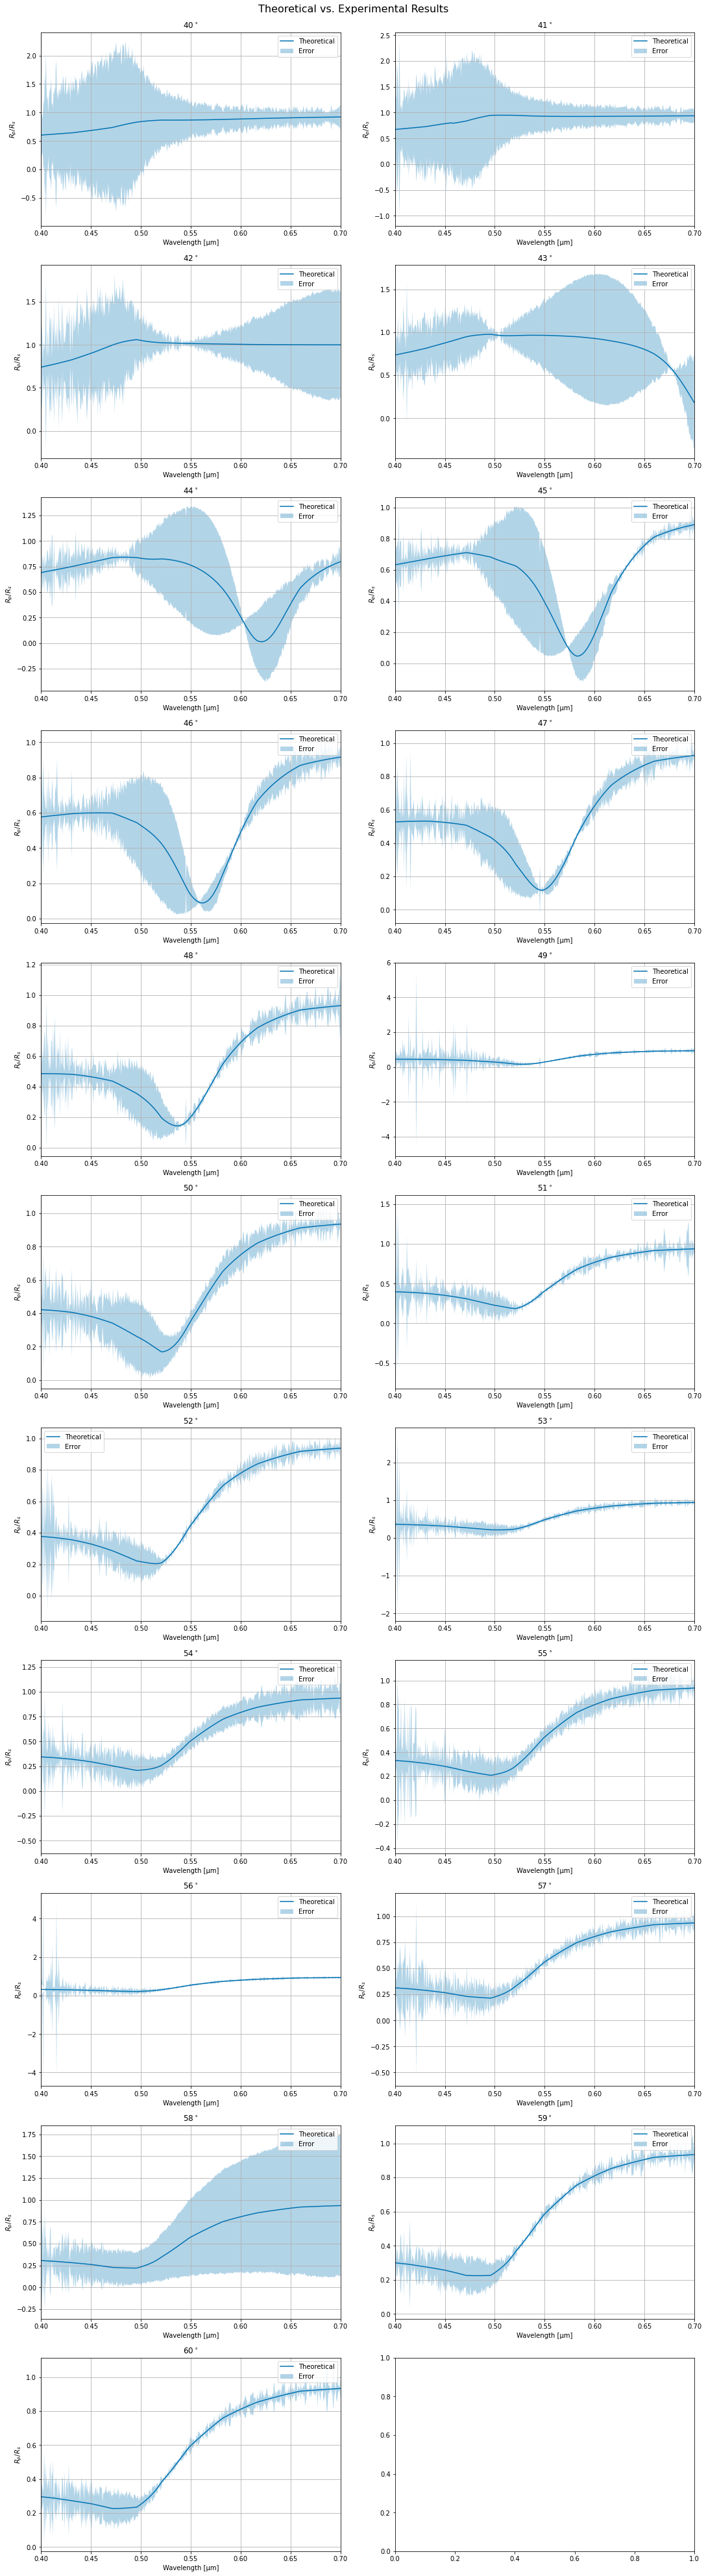

In [19]:
fig, axs = plt.subplots(
    nrows = 11, 
    ncols = 2, 
    figsize = [15, 55],
    constrained_layout=True)
plt.suptitle('Theoretical vs. Experimental Results', fontsize = 16)

for i in range(len(θ)):
    axs[int(i/2), i%2].set(
        title = str(θ[i]) + '$^\circ$', 
        xlabel = 'Wavelength [μm]',
        ylabel = '$R_p/R_s$',
        xlim = (λ_min, λ_max)
    )
    axs[int(i/2), i%2].fill_between(
        λ,
        df_expected[θ[i]]*(1-df_error[θ[i]]),
        df_expected[θ[i]]*(1+df_error[θ[i]]),
        facecolor = 'C0',
        alpha = 0.3,
        interpolate = True,
        label = 'Error')
    axs[int(i/2), i%2].plot(
        df_expected[θ[i]],
        label = 'Theoretical',
        color = 'C0')
    axs[int(i/2), i%2].grid()
    axs[int(i/2), i%2].legend()

It can be seen that there is significant error in many of the measurements, but the error size of the error is fairly consistent across the measurements as can be seen from the box plot below. The measurement at 44$^\circ$ is an outlier and will be discussed seperately. This illustrates that the error is systemic, and this will be the focus of the next section.

<function matplotlib.pyplot.show(close=None, block=None)>

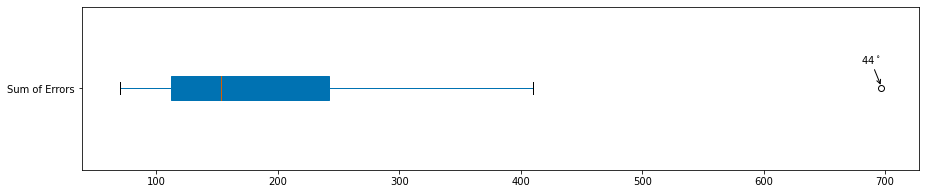

In [35]:
boxplot = df_error.sum().to_frame(name = 'Sum of Errors').plot(kind = 'box',
                                                               vert = False, 
                                                               #notch = True, 
                                                               patch_artist=True,
                                                               figsize = [15,3])
boxplot.annotate(
    '44$^\circ$',
    (697,1.01),
    xytext=(680, 1.15),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    )

plt.show

### Accounting for Variables

The amount of error is obviously quite high at for many of the measurements. Some of these errors may be attributed to the accuracy of the setup. For example the need to estimate the ideal position for the probe arm, or that the fiber optic cable was removed from the setup shortly after the setup as it was deemed to be damaged. Other sources of noise however may be related to variations in metal thickness or impurities in the materials.

In [21]:
noise = np.random.normal(0, .1, λ.shape) # creates an array of noise
d_noise = d*(1+noise)

ds = [[0.05]*len(λ), [0.04]*len(λ), [0.06]*len(λ), d_noise]
Ratios = ['']*4
for i in range(len(Ratios)):
    d = ds[i]
    Ratio = np.empty([len(λ),len(θ)])
    for n in range(len(λ)):
        for m in range(len(θ)):
            k_x[n, m] = (2*π*(n_BK7(λ[n])/λ[n])*sin(np.deg2rad(θ[m])))

            k_z0[n,m] = sqrt(ε_0[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
            k_z1[n,m] = sqrt(ε_1[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
            k_z2[n,m] = sqrt(ε_2[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
    
            rp_01[n, m] = (k_z0[n, m]/ε_0[n] - k_z1[n, m]/ε_1[n])/(k_z0[n, m]/ε_0[n] + k_z1[n, m]/ε_1[n])
            rp_12[n, m] = (k_z1[n, m]/ε_1[n] - k_z2[n, m]/ε_2[n])/(k_z1[n, m]/ε_1[n] + k_z2[n, m]/ε_2[n])

            rs_01[n, m] = (k_z0[n, m] - k_z1[n, m])/(k_z0[n, m] + k_z1[n, m])
            rs_12[n, m] = (k_z1[n, m] - k_z2[n, m])/(k_z1[n, m] + k_z2[n, m])
    
            Rp[n, m] = abs((rp_01[n, m]+rp_12[n, m]*exp(2*1j*k_z1[n, m]*d[n]))/
                      (1+rp_01[n, m]*rp_12[n, m]*exp(2*1j*k_z1[n, m]*d[n])))**2
            Rs[n, m] = abs((rs_01[n, m]+rs_12[n, m]*exp(2*1j*k_z1[n, m]*d[n]))/
                      (1+rs_01[n, m]*rs_12[n, m]*exp(2*1j*k_z1[n, m]*d[n])))**2
            Ratio[n, m] = Rp[n, m]/Rs[n, m]
    Ratios[i] = Ratio

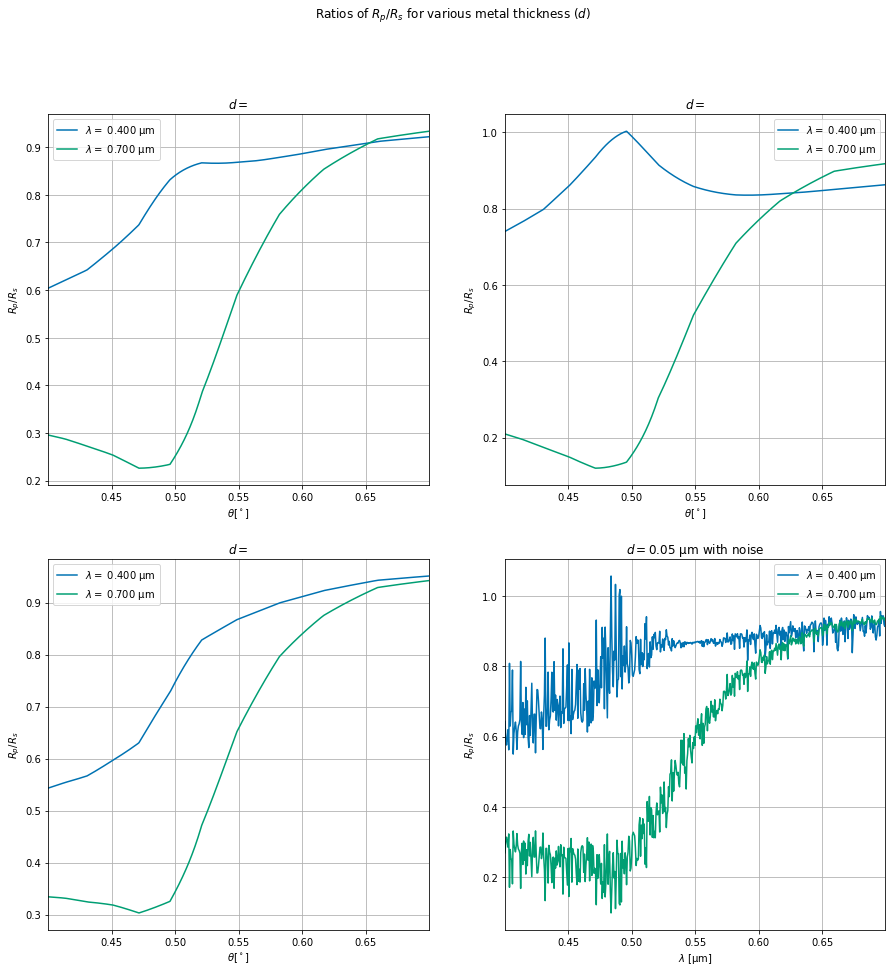

In [22]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = [15, 15])
plt.suptitle('Ratios of $R_p/R_s$ for various metal thickness ($d$)')
for i in range(len(Ratios)-1):
    axs[int(i/2), i%2].set(title='$d=$'+str(), xlabel= '$\\theta[^\circ]$',
               ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
    axs[int(i/2), i%2].plot(λ, Ratios[i][:,0],
                            label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
    axs[int(i/2), i%2].plot(λ, Ratios[i][:,-1],
                            label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm')
    axs[int(i/2), i%2].grid()
    axs[int(i/2), i%2].legend()

axs[1,1].set(title = '$d = 0.05$ µm with noise', xlabel = '$\lambda$ [μm]',
           ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[1,1].plot(λ, Ratios[3][:,0],  label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
axs[1,1].plot(λ, Ratios[3][:,-1], label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm')
axs[1,1].grid()
axs[1,1].legend()

plt.show()

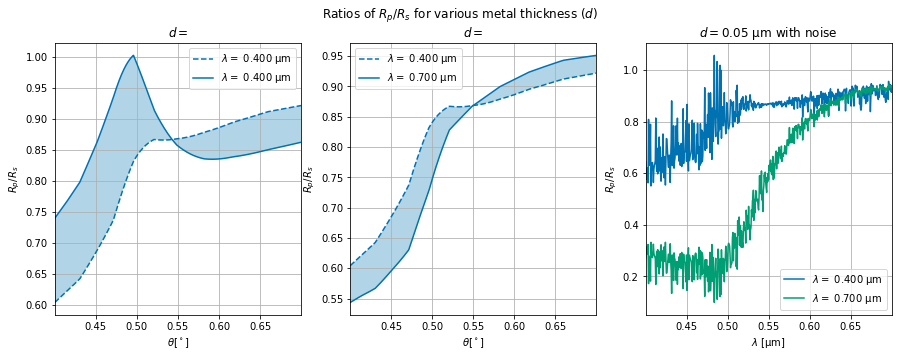

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 5])
plt.suptitle('Ratios of $R_p/R_s$ for various metal thickness ($d$)')

axs[0].set(title='$d=$'+str(), xlabel= '$\\theta[^\circ]$',
               ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[0].plot(λ, Ratios[0][:,0],
                            label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm',
                            color = 'C0',
                            ls = '--')
axs[0].plot(λ, Ratios[1][:,0],
                            label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
axs[0].fill_between(λ, 
                    Ratios[0][:,0], 
                    Ratios[1][:,0],
                    facecolor = 'C0',
                    alpha = 0.3,)
axs[0].grid()
axs[0].legend()

axs[1].set(title='$d=$'+str(), xlabel= '$\\theta[^\circ]$',
               ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[1].plot(λ, Ratios[0][:,0],
            label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm',
            color = 'C0',
            ls = '--')
axs[1].plot(λ, Ratios[2][:,0],
            label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm',
            color = 'C0')
axs[1].fill_between(λ, 
                    Ratios[0][:,0], 
                    Ratios[2][:,0],
                    facecolor = 'C0',
                    alpha = 0.3,)
axs[1].grid()
axs[1].legend()

axs[2].set(title = '$d = 0.05$ µm with noise', xlabel = '$\lambda$ [μm]',
           ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[2].plot(λ, Ratios[3][:,0],  label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
axs[2].plot(λ, Ratios[3][:,-1], label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm')
axs[2].grid()
axs[2].legend()

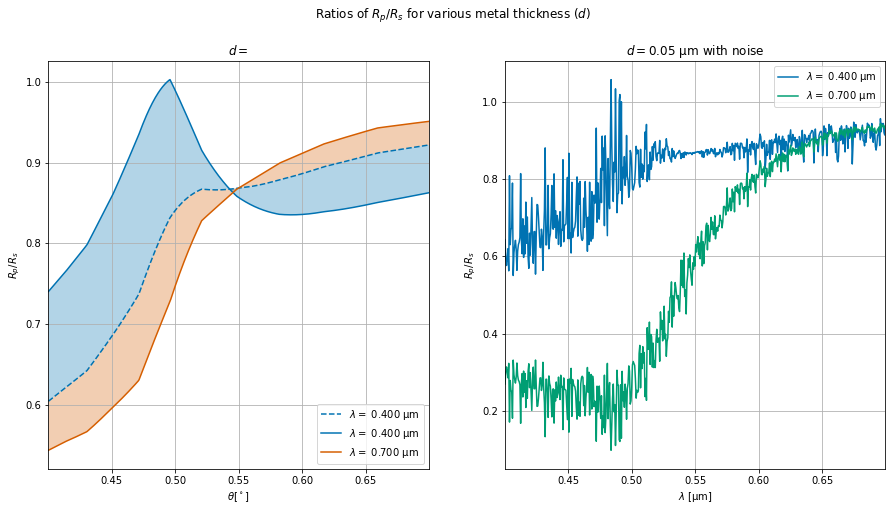

In [24]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 7.5])
plt.suptitle('Ratios of $R_p/R_s$ for various metal thickness ($d$)')

axs[0].set(title='$d=$'+str(), xlabel= '$\\theta[^\circ]$',
               ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[0].plot(λ, Ratios[0][:,0],
                            label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm',
                            color = 'C0',
                            ls = '--')
axs[0].plot(λ, Ratios[1][:,0],
                            label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
axs[0].fill_between(λ, 
                    Ratios[0][:,0], 
                    Ratios[1][:,0],
                    facecolor = 'C0',
                    alpha = 0.3,)

axs[0].plot(λ, Ratios[2][:,0],
            label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm',
            color = 'C2')
axs[0].fill_between(λ, 
                    Ratios[0][:,0], 
                    Ratios[2][:,0],
                    facecolor = 'C2',
                    alpha = 0.3,)
axs[0].grid()
axs[0].legend()

axs[1].set(title = '$d = 0.05$ µm with noise', xlabel = '$\lambda$ [μm]',
           ylabel = '$R_p/R_s$', xlim = (λ[0], λ[-1]))
axs[1].plot(λ, Ratios[3][:,0],  label = '$\lambda =$ ' + str("%0.3f" %λ[0]) + ' µm')
axs[1].plot(λ, Ratios[3][:,-1], label = '$\lambda =$ ' + str("%0.3f" %λ[-1]) + ' µm')
axs[1].grid()
axs[1].legend()

# axs[2].set(xlabel= '$\\theta[^\circ]$', ylabel = '$\lambda$ [μm]')
# axs[2].pcolormesh(θ, λ, Ratio, shading='auto')

It is also possible that the refractive index of the materials has been affected as well. Examples of this include manufacturing impurities such as the purity of the gold or glass, but may also result from the oils in finger prints for example, or even small fluctuations in air temperature. To investigate impurities in the materials a similar method of adding noise may be applied, but this time to the materials.

In [ ]:
d = 0.05

for i in range(len(Ratios)):
    
    Ratio = np.empty([len(λ),len(θ)])
    for n in range(len(λ)):
        for m in range(len(θ)):
            
            
            k_x[n, m] = (2*π*(n_BK7(λ[n])/λ[n])*sin(np.deg2rad(θ[m])))

            k_z0[n,m] = sqrt(ε_0[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
            k_z1[n,m] = sqrt(ε_1[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
            k_z2[n,m] = sqrt(ε_2[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
    
            rp_01[n, m] = (k_z0[n, m]/ε_0[n] - k_z1[n, m]/ε_1[n])/(k_z0[n, m]/ε_0[n] + k_z1[n, m]/ε_1[n])
            rp_12[n, m] = (k_z1[n, m]/ε_1[n] - k_z2[n, m]/ε_2[n])/(k_z1[n, m]/ε_1[n] + k_z2[n, m]/ε_2[n])

            rs_01[n, m] = (k_z0[n, m] - k_z1[n, m])/(k_z0[n, m] + k_z1[n, m])
            rs_12[n, m] = (k_z1[n, m] - k_z2[n, m])/(k_z1[n, m] + k_z2[n, m])
    
            Rp[n, m] = abs((rp_01[n, m]+rp_12[n, m]*exp(2*1j*k_z1[n, m]*d[n]))/
                      (1+rp_01[n, m]*rp_12[n, m]*exp(2*1j*k_z1[n, m]*d[n])))**2
            Rs[n, m] = abs((rs_01[n, m]+rs_12[n, m]*exp(2*1j*k_z1[n, m]*d[n]))/
                      (1+rs_01[n, m]*rs_12[n, m]*exp(2*1j*k_z1[n, m]*d[n])))**2
            Ratio[n, m] = Rp[n, m]/Rs[n, m]
    Ratios[i] = Ratio

In [ ]:
noise = np.random.normal(0, .0001, λ.shape) # creates an array of noise

ε_0 = n_BK7(λ)**2
ε_1 = n_Au(λ)**2
ε_2 = n_Air(λ)**2

# 
k_x = np.empty([len(λ),len(θ)])

k_z0 = np.empty([len(λ),len(θ)], dtype = complex)
k_z1 = np.empty([len(λ),len(θ)], dtype = complex)
k_z2 = np.empty([len(λ),len(θ)], dtype = complex)

rp_01 = np.empty([len(λ),len(θ)], dtype = complex)
rp_12 = np.empty([len(λ),len(θ)], dtype = complex)

rs_01 = np.empty([len(λ),len(θ)], dtype = complex)
rs_12 = np.empty([len(λ),len(θ)], dtype = complex)

Rp = np.empty([len(λ),len(θ)])
Rs = np.empty([len(λ),len(θ)])
Ratio = np.empty([len(λ),len(θ)])
for n in range(len(λ)):
    for m in range(len(θ)):
        k_x[n, m] = (2*π*(n_BK7(λ[n])/λ[n])*sin(np.deg2rad(θ[m])))

        k_z0[n,m] = sqrt(ε_0[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
        k_z1[n,m] = sqrt(ε_1[n]*(2*π/λ[n])**2 - k_x[n,m]**2)
        k_z2[n,m] = sqrt(ε_2[n]*(2*π/λ[n])**2 - k_x[n,m]**2)

        rp_01[n, m] = (k_z0[n, m]/ε_0[n] - k_z1[n, m]/ε_1[n])/(k_z0[n, m]/ε_0[n] + k_z1[n, m]/ε_1[n])
        rp_12[n, m] = (k_z1[n, m]/ε_1[n] - k_z2[n, m]/ε_2[n])/(k_z1[n, m]/ε_1[n] + k_z2[n, m]/ε_2[n])

        rs_01[n, m] = (k_z0[n, m] - k_z1[n, m])/(k_z0[n, m] + k_z1[n, m])
        rs_12[n, m] = (k_z1[n, m] - k_z2[n, m])/(k_z1[n, m] + k_z2[n, m])

        Rp[n, m] = abs((rp_01[n, m]+rp_12[n, m]*exp(2*1j*k_z1[n, m]*d))/
                      (1+rp_01[n, m]*rp_12[n, m]*exp(2*1j*k_z1[n, m]*d)))**2
        Rs[n, m] = abs((rs_01[n, m]+rs_12[n, m]*exp(2*1j*k_z1[n, m]*d))/
                      (1+rs_01[n, m]*rs_12[n, m]*exp(2*1j*k_z1[n, m]*d)))**2
        Ratio[n, m] = Rp[n, m]/Rs[n, m]

In [ ]:
noise = np.random.normal(0, .0001, λ.shape) # creates an array of noise

ε_0 = (n_BK7(λ)**2)
ε_1 = n_Au(λ)**2
ε_2 = n_Air(λ)**2

print(ε_0)
print(ε_0*noise)